In [90]:
import math as ma
from random import randint
from timeit import default_timer as timer
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


### Funktio zum berechen des Typs der Matrix und checken ob es sich um eine quadratische Matrix handelt

In [46]:
def calc_matrix_type(matrix):
    type = {"row": 0, "column": 0}
    if len(matrix) == 0:
        return type
    type["row"] = len(matrix)
    type["column"] = len(matrix[0])
    return type

In [47]:
def is_square_matrix(matrix):
    type = calc_matrix_type(matrix)
    return type["row"] == type["column"]

In [48]:
def is_diagonal_matrix(matrix):
    if not is_square_matrix(matrix):
        return False
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if i != j and matrix[i][j] != 0:
                return False
    return True

In [49]:
def is_identity_matrix(matrix):
    if not is_diagonal_matrix(matrix):
        return False
    for i in range(len(matrix)):
        if matrix[i][i] != 1:
            return False
    return True

In [69]:
def calc_determinant(matrix):
    if not is_square_matrix(matrix):
        return None
    if len(matrix) == 1:
        return matrix[0][0]
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    det = 0
    for i in range(len(matrix)):
        det += matrix[0][i] * ma.pow(-1, i) * calc_determinant([row[:i] + row[i+1:] for row in matrix[1:]])
    return det

In [70]:
def generate_matrix(row, column):
    matrix = []
    for i in range(row):
        matrix.append([])
        for j in range(column):
            matrix[i].append(0)
    return matrix

In [71]:
def fill_matrix(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i][j] = randint(0, 1000)
    return matrix

In [72]:
matrix = generate_matrix(5, 5)
matrix = fill_matrix(matrix)
print(matrix)
print(calc_matrix_type(matrix))
det = calc_determinant(matrix)
print(det)

[[24, 787, 992, 72, 42], [995, 721, 15, 346, 406], [347, 280, 669, 3, 147], [744, 633, 236, 335, 989], [79, 691, 965, 968, 507]]
{'row': 5, 'column': 5}
280516161765914.0


In [101]:
def gen_test():
    data = []
    for i in range(1, 10):
        matrix = generate_matrix(i, i)
        matrix = fill_matrix(matrix)
        start = timer()
        result = calc_determinant(matrix)
        end = timer()
        time = end - start
        data.append([i*i, time])
    return data

In [102]:
data = gen_test()
for i in range(100):
    new_data = gen_test()
    for j in range(len(data)):
        data[j][1] += new_data[j][1]
for i in range(len(data)):
    data[i][1] /= 100
print(data)

[[1, 5.549821071326733e-07], [4, 4.875008016824723e-07], [9, 3.388745244592428e-06], [16, 1.4669583179056644e-05], [25, 7.554415846243501e-05], [36, 0.00045190791599452495], [49, 0.003155527859926224], [64, 0.025249548810534178], [81, 0.22797575329896064]]


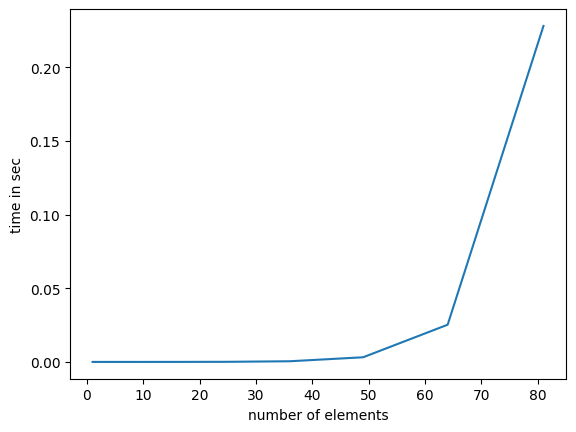

In [104]:
x = [data[i][0] for i in range(len(data))]
y = [data[i][1] for i in range(len(data))]

plt.plot(x, y)
plt.ylabel("time in sec")
plt.xlabel("number of elements")
plt.show()



